# Practice 1
Practice with the four categories of models learned in Lecture 1: Location Theory

1. Location Theory Practice
    - Category 1: P-median
    - Category 2: Covering problem
      - Set covering
      - Maximal covering problem
    - Category 3: P-center problem
    - Category 4: Fixed charge location problem
      - Uncapacitated fixed charge facility location problem
      - Capacitated fixed charge facility location problem

2. Computation Time

# Import library

In [9]:
#!pip install gurobipy  # install gurobipy, if not already installed
import gurobipy as gp  # import the installed package
from gurobipy import Model, GRB, quicksum
import math
import networkx as nx
import matplotlib.pyplot as plt

env = gp.Env(empty=True)
env.setParam("SoftMemLimit", 2.0)   # 2GB 넘으면 중단
env.start()

Set parameter Username
Set parameter SoftMemLimit to value 2
Academic license - for non-commercial use only - expires 2026-02-24


<gurobipy.Env, Parameter changes: SoftMemLimit=2.0>

# Functions

## Problem plot

In [10]:
def p_median_center_plot(facilities, customers):
    fig, ax = plt.subplots(figsize=(8,8))

    # facilities: red hollow squares
    fac_scatter = ax.scatter([],[], marker='s', s=120, facecolors='none', edgecolors='red', linewidths=1.5, label="Facility candidates")
    for f, (x, y) in facilities.items():
        ax.scatter([x],[y], marker='s', s=120, facecolors='none', edgecolors='red', linewidths=1.5)
        ax.text(x+0.1, y+0.1, f, fontsize=11, color='black')

    # customers: blue filled circles
    cust_scatter = ax.scatter([],[], marker='o', s=80, color='blue', label="Customers")
    for i, (x, y) in customers.items():
        ax.scatter([x],[y], marker='o', s=80, color='blue')
        ax.text(x+0.1, y+0.1, str(i), fontsize=10, color='black')

    ax.set_aspect('equal', adjustable='box')
    ax.set_xlim(0, 17)
    ax.set_ylim(0, 12)
    ax.grid(True, linestyle='--', alpha=0.4)

    # legend
    ax.legend(loc='best')

    plt.show()

In [11]:
def covering_problem_plot(I, J, S, Ni, facilities, customers):
    fig, ax = plt.subplots(figsize=(8,8))

    # Facilities + coverage circles
    for j in J:
        x, y = facilities[j]
        ax.scatter([x],[y], marker='s', s=120, facecolors='none', edgecolors='red', linewidths=1.8)
        ax.text(x+0.1, y+0.1, j, fontsize=11, color='black')
        circ = plt.Circle((x, y), S, fill=False, linewidth=1, alpha=0.7, linestyle='-.', color='green')
        ax.add_patch(circ)

    # Customers + labels Ni
    for i in I:
        x, y = customers[i]
        ax.scatter([x],[y], marker='o', s=80, color='blue')
        label = f"{i}: N_i= {Ni[i]}" if Ni[i] else f"{i}: N_i=∅"
        ax.text(x+0.1, y+0.1, label, fontsize=10, color='black')


    ax.set_aspect('equal', adjustable='box')
    ax.set_xlim(0, 17)
    ax.set_ylim(0, 12)
    ax.grid(True, linestyle='--', alpha=0.4)

    # Legend
    ax.scatter([],[], marker='o', s=80, color='blue', label='Customers (i)')
    ax.scatter([],[], marker='s', s=120, facecolors='none', edgecolors='red', linewidths=1.8, label='Facilities (j)')
    ax.plot([], [], linewidth=1.5, label='Coverage circle (radius S)')
    ax.legend(loc='best')
    plt.show()

In [12]:
def fixed_charge_plot(facilities, customers, h, f):
    fig, ax = plt.subplots(figsize=(8,8))

    # facilities: red hollow squares
    fac_scatter = ax.scatter([],[], marker='s', s=120, facecolors='none', edgecolors='red', linewidths=1.5, label="Facility candidates")
    for j, (x, y) in facilities.items():
        ax.scatter([x],[y], marker='s', s=120, facecolors='none', edgecolors='red', linewidths=1.5)
        ax.text(x+0.1, y+0.1, str(f)+f"(f={f[j]})", fontsize=11, color='black')

    # customers: blue filled circles
    cust_scatter = ax.scatter([],[], marker='o', s=80, color='blue', label="Customers")
    for i, (x, y) in customers.items():
        ax.scatter([x],[y], marker='o', s=80, color='blue')
        ax.text(x+0.1, y+0.1, str(i)+f"h={h[i]}", fontsize=10, color='black')

    ax.set_aspect('equal', adjustable='box')
    ax.set_xlim(0, 17)
    ax.set_ylim(0, 12)
    ax.grid(True, linestyle='--', alpha=0.4)

    # legend
    ax.legend(loc='best')

    plt.show()

## Result plot

In [13]:
def result_plot1(x, y, I, J, h,facilities, customers):  # Using P-median, Fixed Charge Location Problem
    fig, ax = plt.subplots(figsize=(8,8))

    # facilities candidates: red hollow squares
    for f, (x1, y1) in facilities.items():
        ax.scatter([x1],[y1], marker='s', s=120, facecolors='none', edgecolors='red', linewidths=1.5)
        ax.text(x1+0.1, y1+0.1, f, fontsize=11, color='black')

    # selected facilities
    for j in J:
        if x[j].X == 1:
            (x1,y1) = facilities[j]
            ax.scatter([x1],[y1], marker='s', s=120, facecolors='red', edgecolors='red', linewidths=1.5)

    # customers: blue filled circles
    for i, (x1, y1) in customers.items():
        ax.scatter([x1],[y1], marker='o', s=80, color='blue')
        ax.text(x1+0.1, y1+0.1, str(i)+f" (h={h[i]})", fontsize=10, color='black')

    # assignment
    for i in I:
        for j in J:
            if y[i,j].X == 1:
                (x1,y1) = customers[i]
                (x2,y2) = facilities[j]
                ax.plot([x1, x2], [y1, y2], linewidth=1.2, color='black')


    ax.set_aspect('equal', adjustable='box')
    ax.set_xlim(0, 17)
    ax.set_ylim(0, 12)
    ax.grid(True, linestyle='--', alpha=0.4)

    # legend
    h1 = ax.scatter([],[], marker='o', s=80, color='blue', label='Customers')
    h2 = ax.scatter([],[], marker='s', s=120, facecolors='none', edgecolors='red', linewidths=1.8, label='Facility candidates')
    h3 = ax.scatter([],[], marker='s', s=120, facecolors='red', edgecolors='red', linewidths=1.5, label='Selected facilities')
    ax.legend(loc='best')

    plt.show()

In [14]:
def result_plot2(x, z, h, J, S, facilities, customers): # Using Covering
    fig, ax = plt.subplots(figsize=(8,8))

    # Facilities + coverage circles
    for j in J:
        (x1, y1) = facilities[j]
        ax.scatter([x1],[y1], marker='s', s=120, facecolors='none', edgecolors='red', linewidths=1.5)
        ax.text(x1+0.1, y1+0.1, j, fontsize=11, color='black')

    # selected facilities
    for j in J:
        if x[j].X == 1:
            (x1,y1) = facilities[j]
            ax.scatter([x1],[y1], marker='s', s=120, facecolors='red', edgecolors='red', linewidths=1.5)
            circ = plt.Circle((x1, y1), S, fill=False, linewidth=1, alpha=0.7, linestyle='-.', color='green')
            ax.add_patch(circ)


    # customers: blue filled circles
    for i, (x1, y1) in customers.items():
        ax.scatter([x1],[y1], marker='o', s=80, color='blue')
        if (z!=None) and (z[i].X == 1):
            ax.text(x1+0.1, y1+0.1, str(i)+f' (h={h[i]})', fontsize=10, color='black')
        else:
            ax.text(x1+0.1, y1+0.1, str(i), fontsize=10, color='black')

    ax.set_aspect('equal', adjustable='box')
    ax.set_xlim(0, 17)
    ax.set_ylim(0, 12)
    ax.grid(True, linestyle='--', alpha=0.4)

    # legend
    h1 = ax.scatter([],[], marker='o', s=80, color='blue', label='Customers')
    h2 = ax.scatter([],[], marker='s', s=120, facecolors='none', edgecolors='red', linewidths=1.8, label='Facility candidates')
    h3 = ax.scatter([],[], marker='s', s=120, facecolors='red', edgecolors='red', linewidths=1.5, label='Selected facilities')
    ax.legend(loc='best')

    plt.show()

In [15]:
def result_plot3(x, y, D, I, J, facilities, customers, d): # Using P-center
    fig, ax = plt.subplots(figsize=(8,8))

    # facilities candidates: red hollow squares
    for f, (x1, y1) in facilities.items():
        ax.scatter([x1],[y1], marker='s', s=120, facecolors='none', edgecolors='red', linewidths=1.5)
        ax.text(x1+0.1, y1+0.1, f, fontsize=11, color='black')

    # selected facilities
    for j in J:
        if x[j].X == 1:
            (x1,y1) = facilities[j]
            ax.scatter([x1],[y1], marker='s', s=120, facecolors='red', edgecolors='red', linewidths=1.5)

    # customers: blue filled circles
    for i, (x1, y1) in customers.items():
        ax.scatter([x1],[y1], marker='o', s=80, color='blue')
        ax.text(x1+0.1, y1+0.1, str(i), fontsize=10, color='black')

    # assignment
    for i in I:
        for j in J:
            if y[i,j].X == 1:
                (x1,y1) = customers[i]
                (x2,y2) = facilities[j]
                if d[(i,j)] == D.X:
                    ax.plot([x1, x2], [y1, y2], linewidth=2, color='green')
                else:
                    ax.plot([x1, x2], [y1, y2], linewidth=1.2, color='black')


    ax.set_aspect('equal', adjustable='box')
    ax.set_xlim(0, 17)
    ax.set_ylim(0, 12)
    ax.grid(True, linestyle='--', alpha=0.4)

    # legend
    h1 = ax.scatter([],[], marker='o', s=80, color='blue', label='Customers')
    h2 = ax.scatter([],[], marker='s', s=120, facecolors='none', edgecolors='red', linewidths=1.8, label='Facility candidates')
    h3 = ax.scatter([],[], marker='s', s=120, facecolors='red', edgecolors='red', linewidths=1.5, label='Selected facilities')
    ax.legend(loc='best')

    plt.show()

<a name="location_theory_practice"></a>
# Location Theory Practice

## Data

In [16]:
# Customers set
customers = {
    1:(1,7), 2:(3,9), 3:(7,7), 4:(6,3), 5:(8,2),
    6:(9,4), 7:(13,4), 8:(15,9), 9:(11,11),
    10:(2,3)
}
I = list(customers.keys())

# Facilities set
facilities = {
    "A": (2, 8),
    "B": (6, 9),
    "C": (8, 5),
    "D": (5, 2),
    "E": (12, 7)
}
J = list(facilities.keys())

# Distance
def calculate_distance(I, J):
  d = {}
  for key, i in customers.items():
    for key2, j in facilities.items():
      dx = i[0] - j[0]
      dy = i[1] - j[1]
      dist = math.sqrt(dx*dx + dy*dy)
      d[(key,key2)] = dist
  return d

d = calculate_distance(I, J)

<a name="pmedian"></a>
## Category 1: P-median model

### Given
- Customers set $I$
- Candidate facility location set $J$
<br>

### Input
- $h_j$ = customer demand at node $i\in I$
- $d_{ij}$ = distance between demand node $i \in I$ and candidate $j\in J$
- $P$ = number of facilities to locate

<br>

### Decision Variable
- $X_j \begin{cases}1 \text{ if we locate a factility at candidate location }j\in J \\ 0\text{ otherwise}\end{cases}$
- $Y_{ij} \begin{cases}1 \text{ if customer }i\in I \text{ is served by a facility at }j\in J \\ 0\text{ otherwise}\end{cases}$

<br>

### Mathematical model

min $ \sum_{i\in I} \sum_{j\in J} h_i d_{ij} Y_{ij} $

$ \begin{align}\text{s.t }&\sum_{j\in J}X_j=P \\ &Y_{ij}\le X_j \quad\forall i\in I,j\in J \\ &\sum_{j\in J}Y_{ij}=1 \quad\forall i\in I \\ &X_j\in\{0,1\}\quad\forall j\in J\\ &Y_{ij}\in\{0,1\}\quad\forall i\in I,j\in J \end{align}$

#### **Fill in the blanks and find the optimal solution.**
- Parameter
    - Number of facilities to locate ($P$) = 2

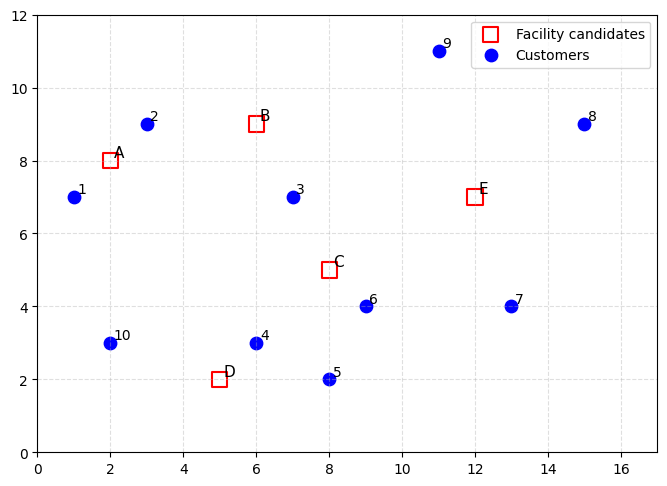

In [17]:
# Set parameter
h = {
    1: 8,
    2: 6,
    3: 4,
    4: 9,
    5: 3,
    6: 10,
    7: 7,
    8: 11,
    9: 8,
    10: 10
}

# Visualization
p_median_center_plot(facilities, customers)

Gurobi Optimizer version 12.0.2 build v12.0.2rc0 (mac64[arm] - Darwin 24.6.0 24G90)

CPU model: Apple M2
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Non-default parameters:
SoftMemLimit  2

Optimize a model with 61 rows, 55 columns and 155 nonzeros
Model fingerprint: 0x72057fda
Variable types: 0 continuous, 55 integer (55 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [8e+00, 1e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+00]
Found heuristic solution: objective 359.7861512
Presolve time: 0.00s
Presolved: 61 rows, 55 columns, 155 nonzeros
Variable types: 0 continuous, 55 integer (55 binary)

Root relaxation: objective 3.027938e+02, 31 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0  302.79377    0   24  359.78615  302.79377  15.8%     -

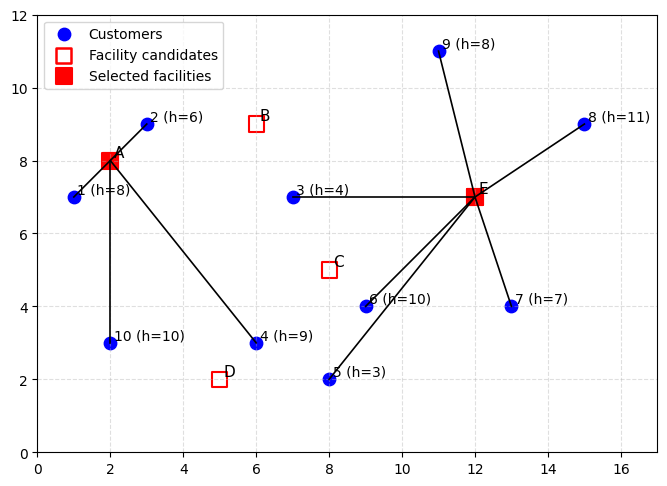

In [18]:
def p_median(I, J, h, d, P, plot=False, env=env):
  # Define Model
  m = Model(env=env)

  # Decision Variable
  x = m.addVars(J, vtype=GRB.BINARY)
  y = m.addVars(I, J, vtype=GRB.BINARY)

  # Set objective function
  m.setObjective(quicksum(h[i]*d[(i,j)]*y[i,j] for i in I for j in J), GRB.MINIMIZE)

  # Add constraints

  # 1.Locate P facilities
  m.addConstr(quicksum(x[j] for j in J) == P)

  # 2.Assignment is allowed only for open facility
  for i in I:
    for j in J:
      m.addConstr(y[i,j] <= x[j])

  # 3.Single allocation
  for i in I:
    m.addConstr(quicksum(y[i,j] for j in J) == 1)

  # Optimize
  m.optimize()

  # Result
  print(f'Objective Value: {m.ObjVal}\n')
  
  # Visualization
  if plot:
    result_plot1(x, y, I, J, h, facilities, customers)
  
  if m.Status == GRB.OPTIMAL:
    return m.Runtime
  else:
    print("메모리 제한(SoftMemLimit)에 도달하여 계산이 중단되었습니다.")
    return None


# Run the model

P = 2 # Number of facilities to locate

result = p_median(I, J, h, d, P, plot=True)

<a name="covering"></a>
## Category 2: Covering problem

<a name="set_covering"></a>
## Set covering problem

### Given
- Customers set $I$
- Candidate facility location set $J$
<br>

### Input
- $c_j$ = fixed cost of siting a facility a node $j$
- $S$ = maximum acceptable service distance (or time)
- $N_i$ = set of facility sites $j$ within acceptable distance of node $i$ (i.e., $N_i = \{j\vert d_{ij}\le S\}$)

<br>

### Decision Variable
- $X_j \begin{cases}1 \text{ if we locate a factility at candidate location }j\in J \\ 0\text{ otherwise}\end{cases}$

<br>


### Mathematical model

min $ \sum_{j\in J} c_j\cdot X_j $

$ \begin{align}\text{s.t }&\sum_{j\in N_i}X_j\ge1 \quad\forall i\in I\\ &X_j\in\{0,1\}\quad\forall j\in J\end{align}$


#### **Fill in the blanks and find the optimal solution.**
- Coverage distance ($S$) = 3

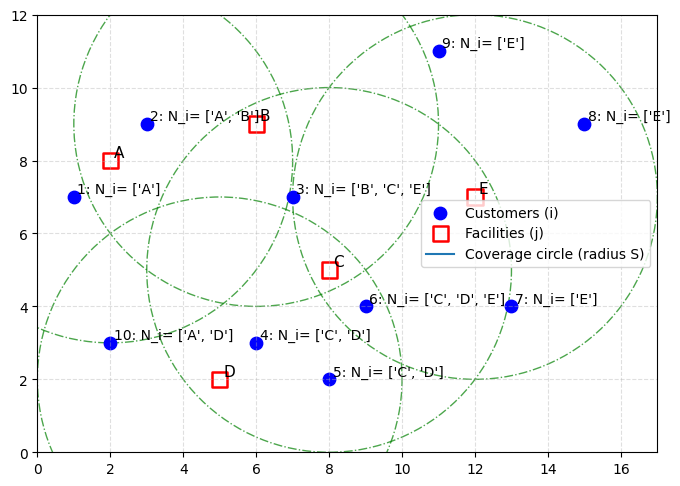

In [19]:
# Set parameter

def compute_Ni(S):
    Ni = {}
    for i in I:
        Ni[i] = sorted([j for j in J if d[(i,j)] <= S])
    return Ni

S = 5 # maximum acceptable service distance
c = {'A':1,'B':1,'C':1,'D':1,'E':1} # fixed cost of siting a facility a node $j$
Ni = compute_Ni(S) # set of facility sites $j$ within acceptable distance of node $i$

# Visualization
covering_problem_plot(I, J, S, Ni, facilities, customers)

Gurobi Optimizer version 12.0.2 build v12.0.2rc0 (mac64[arm] - Darwin 24.6.0 24G90)

CPU model: Apple M2
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Non-default parameters:
SoftMemLimit  2

Optimize a model with 10 rows, 5 columns and 18 nonzeros
Model fingerprint: 0x8800688b
Variable types: 0 continuous, 5 integer (5 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 3.0000000
Presolve removed 10 rows and 5 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.00 seconds (0.00 work units)
Thread count was 1 (of 8 available processors)

Solution count 1: 3 

Optimal solution found (tolerance 1.00e-04)
Best objective 3.000000000000e+00, best bound 3.000000000000e+00, gap 0.0000%
Objective Value: 3.0


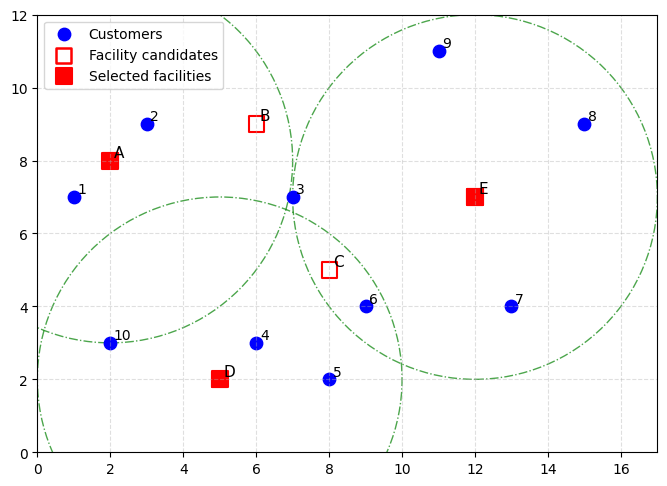

In [20]:
def set_covering(I, J, c, Ni, plot=False, env=env):
  
  # Define Model
  m = Model(env=env)
  # Decision Variable
  x = m.addVars(J, vtype=GRB.BINARY)

  # Set objective function
  m.setObjective(quicksum(c[j]*x[j] for j in J), GRB.MINIMIZE)

  # Add constraints

  # 1.All demands i should have at least one facility located within the acceptable service distance
  for i in I:
    m.addConstr(quicksum(x[j] for j in Ni[i]) >= 1)

  # Optimize
  m.optimize()

  # Result
  print(f'Objective Value: {m.ObjVal}')

  # Visualization
  if plot:
    result_plot2(x, None, None, J, S, facilities, customers)
  
  if m.Status == GRB.OPTIMAL:
    return m.Runtime
  else:
    print("메모리 제한(SoftMemLimit)에 도달하여 계산이 중단되었습니다.")
    return None


# Run the model
result = set_covering(I, J, c, Ni, plot=True)

<a name="maximal_covering"></a>
## Maximal covering problem

### Given
- Customers set $I$
- Candidate facility location set $J$
<br>

### Input
- $h_j$ = customer demand at node $i\in I$
- $P$ = number of facilities to locate
- $N_i$ = set of facility sites $j$ within acceptable distance of node $i$ (i.e., $N_i = \{j\vert d_{ij}\le S\}$)

<br>

### Decision Variable
- $X_j \begin{cases}1 \text{ if we locate a factility at candidate location }j\in J \\ 0\text{ otherwise}\end{cases}$
- $Z_{i} \begin{cases}1 \text{ if node }i\in I \text{ is covered } \\ 0\text{ otherwise}\end{cases}$

<br>

### Mathematical model

max $ \sum_{i\in I} h_iZ_i $

$ \begin{align}\text{s.t }&\sum_{j\in J}X_j\le P\\ &Z_i\le\sum_{j\in N_i}X_j\quad\forall i\in I\\ &X_j\in \{0,1\}\quad\forall j\in J\\ &Z_i\in \{0,1\}\quad\forall i\in I \end{align}$


#### **Fill in the blanks and find the optimal solution.**
- Coverage distance = 5
- Number of facilities to locate ($P$) = 2

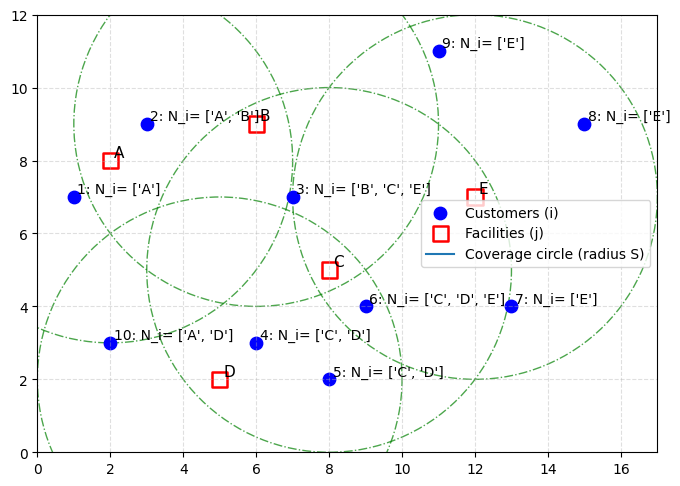

In [21]:
# Set parameters

def compute_Ni(S):
    Ni = {}
    for i in I:
        Ni[i] = sorted([j for j in J if d[(i,j)] <= S])
    return Ni

# Define S
S = 5 # maximum acceptable service distance
Ni = compute_Ni(S) # set of facility sites $j$ within acceptable distance of node $i$
P = 2 # number of facilities to locate
h = { # customer demand at node $i\in I$
    1: 8,
    2: 6,
    3: 4,
    4: 9,
    5: 3,
    6: 10,
    7: 7,
    8: 11,
    9: 8,
    10: 10
}

# Visualization
covering_problem_plot(I, J, S, Ni, facilities, customers)

Gurobi Optimizer version 12.0.2 build v12.0.2rc0 (mac64[arm] - Darwin 24.6.0 24G90)

CPU model: Apple M2
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Non-default parameters:
SoftMemLimit  2

Optimize a model with 11 rows, 15 columns and 33 nonzeros
Model fingerprint: 0xf701af5b
Variable types: 0 continuous, 15 integer (15 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e+00, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e+00, 2e+00]
Found heuristic solution: objective 50.0000000
Presolve removed 5 rows and 5 columns
Presolve time: 0.00s
Presolved: 6 rows, 10 columns, 22 nonzeros
Variable types: 0 continuous, 10 integer (10 binary)

Root relaxation: objective 6.400000e+01, 3 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0      6

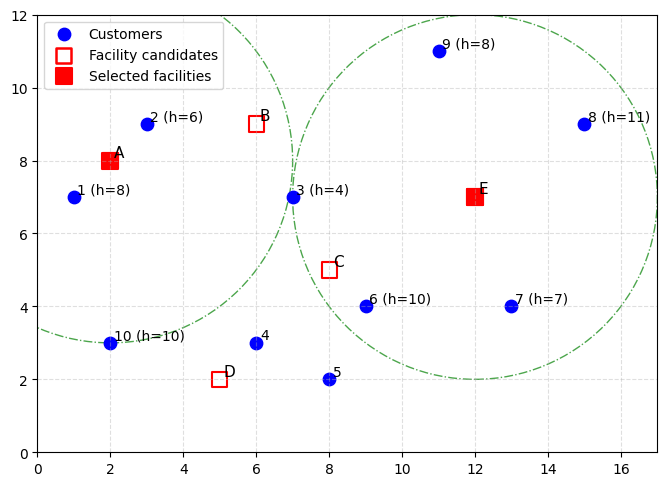

In [22]:
def max_covering(I, J, h, P, Ni, plot=False, env=env):
  
  # Define Model
  m = Model(env=env)

  # Decision Variable
  x = m.addVars(J, vtype=GRB.BINARY)
  z = m.addVars(I, vtype=GRB.BINARY)

  # Set objective function
  m.setObjective(quicksum(h[i]*z[i] for i in I), GRB.MAXIMIZE)

  # Add constraints

  # 1.Construct no more than P facilities
  m.addConstr(quicksum(x[j] for j in J) == P)

  # 2.Demand at node 𝑖 ∈ 𝐼 cannot be covered unless at least one of the facility locations that can cover node 𝑖 is selected
  for i in I:
    m.addConstr(z[i] <= quicksum(x[j] for j in Ni[i]))

  # Optimize
  m.optimize()

  # Result
  print(f'Objective Value: {m.ObjVal}')

  # Visualization
  if plot:
    result_plot2(x, z, h, J, S, facilities, customers)
  
  if m.Status == GRB.OPTIMAL:
    return m.Runtime
  else:
    print("메모리 제한(SoftMemLimit)에 도달하여 계산이 중단되었습니다.")
    return None


# Run the model
result = max_covering(I, J, h, P, Ni, plot=True)

<a name="pcenter"></a>
## Category 3: P-center problem


### Given
- Customers set $I$
- Candidate center location set $J$
<br>

### Input
- $h_j$ = customer demand at node $i\in I$
- $d_{ij}$ = distance between demand node $i\in I$ and candidate $j\in J$
- $P$ = number of facilities to locate

<br>

### Decision Variable
- $X_j \begin{cases}1 \text{ if we locate a factility at candidate location }j\in J \\ 0\text{ otherwise}\end{cases}$
- $Y_{ij} \begin{cases}1 \text{ if customer }i\in I \text{ is served by a facility at }j\in J \\ 0\text{ otherwise}\end{cases}$
- $D$ = maximum distance between a demand node and the assigned facility

<br>

### Mathematical model

min $ D $

$ \begin{align}\text{s.t }&\sum_{j\in J}X_j=P \\ &Y_{ij}\le X_j \quad\forall i\in I,j\in J \\ &\sum_{j\in J}Y_{ij}=1 \quad\forall i\in I \\ &D\ge\sum_{j\in J}d_{ij}Y_{ij}\quad\forall i\in I\\ &X_j\in\{0,1\}\quad\forall j\in J\\ &Y_{ij}\in\{0,1\}\quad\forall i\in I,j\in J \end{align}$

#### **Fill in the blanks and find the optimal solution.**
- P = 2

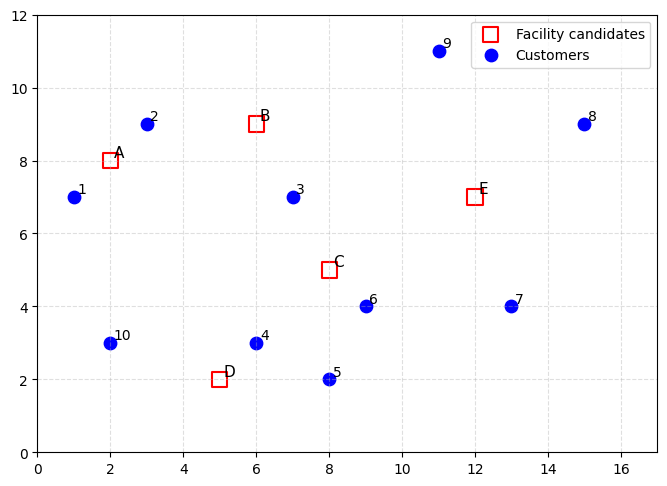

In [23]:
# Set parameter
P = 2

# Visualization
p_median_center_plot(facilities, customers)

Gurobi Optimizer version 12.0.2 build v12.0.2rc0 (mac64[arm] - Darwin 24.6.0 24G90)

CPU model: Apple M2
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Non-default parameters:
SoftMemLimit  2

Optimize a model with 71 rows, 56 columns and 215 nonzeros
Model fingerprint: 0x567741e1
Variable types: 1 continuous, 55 integer (55 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+00]
Found heuristic solution: objective 9.4868330
Presolve removed 6 rows and 7 columns
Presolve time: 0.00s
Presolved: 65 rows, 49 columns, 177 nonzeros
Variable types: 1 continuous, 48 integer (48 binary)

Root relaxation: objective 5.031164e+00, 54 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    5.03116    0   2

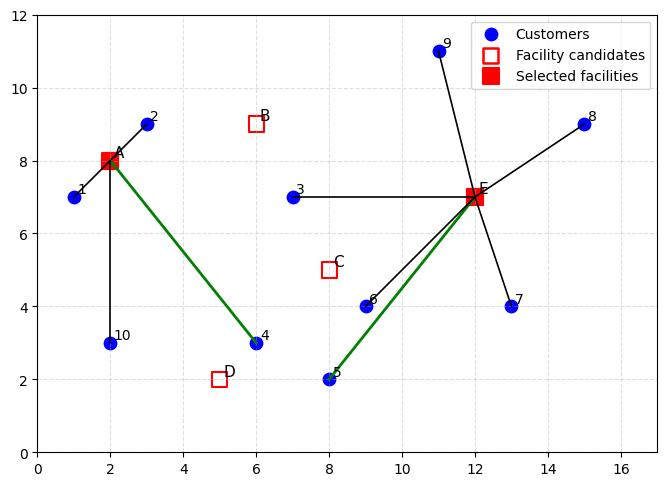

In [24]:
def p_center(I, J, d, P, plot=False, env=env):
  
  # Define Model
  m = Model(env=env)
  
  # Decision Variable
  x = m.addVars(J, vtype=GRB.BINARY)
  y = m.addVars(I, J, vtype=GRB.BINARY)
  D = m.addVar(vtype=GRB.CONTINUOUS)

  # Set objective function
  m.setObjective(D, GRB.MINIMIZE)

  # Add constraints

  # 1.Locate no more than P facilities
  m.addConstr(quicksum(x[j] for j in J) == P)

  # 2.To cover demand at node 𝑖 ∈ 𝐼, facility must exist at node 𝑗 ∈ 𝐽
  for i in I:
    for j in J:
      m.addConstr(y[i,j] <= x[j])

  # 3.Demand at node 𝑖 ∈ 𝐼 must be covered by a facility
  for i in I:
    m.addConstr(quicksum(y[i,j] for j in J) == 1)

  # 4.Maximum distance for all customers (D) must be greater than the distance
  #   between any demand node 𝑖 ∈ 𝐼 and the facility 𝑗 ∈ 𝐽 to which it is assigned
  for i in I:
    m.addConstr(D >= quicksum(d[(i,j)]*y[i,j] for j in J))


  # Optimize
  m.optimize()

  # Result
  print(f'Objective Value: {m.ObjVal}')
  
  # Visualization
  if plot:
    result_plot3(x, y, D, I, J, facilities, customers, d)
  
  if m.Status == GRB.OPTIMAL:
    return m.Runtime
  else:
    print("메모리 제한(SoftMemLimit)에 도달하여 계산이 중단되었습니다.")
    return None


# Run the model
result = p_center(I, J, d, P, plot=True)

<a name="fixed_charge"></a>
## Category 4: Fixed charge location problem

<a name="uncapacitated"></a>
## Uncapacitated fixed charge facility location problem

### Given
- Customers set $I$
- Candidate facility location set $J$
<br>

### Input
- $f_j$ = fixed cost of building a facility at candidate location $j\in J$
- $h_j$ = customer demand at node $i\in I$
- $d_{ij}$ = distance between demand node $i\in I$ and candidate $j\in J$
- $\alpha$ = transportation cost per unit distance and unit demand

<br>

### Decision Variable
- $X_j \begin{cases}1 \text{ if we locate a factility at candidate location }j\in J \\ 0\text{ otherwise}\end{cases}$
- $Y_{ij} \begin{cases}1 \text{ if customer }i\in I \text{ is served by a facility at }j\in J \\ 0\text{ otherwise}\end{cases}$

<br>

### Mathematical model

min $ \sum_{j\in J}f_jX_j+\alpha\sum_{i\in I}\sum_{j\in J}h_id_{ij}Y_{ij} $

$ \begin{align}\text{s.t } &Y_{ij}\le X_j \quad\forall i\in I,j\in J \\ &\sum_{j\in J}Y_{ij}=1 \quad\forall i\in I \\ &X_j\in\{0,1\}\quad\forall j\in J\\ &Y_{ij}\in\{0,1\}\quad\forall i\in I,j\in J \end{align}$

#### **Fill in the blanks and find the optimal solution.**
- $\alpha$ = 1

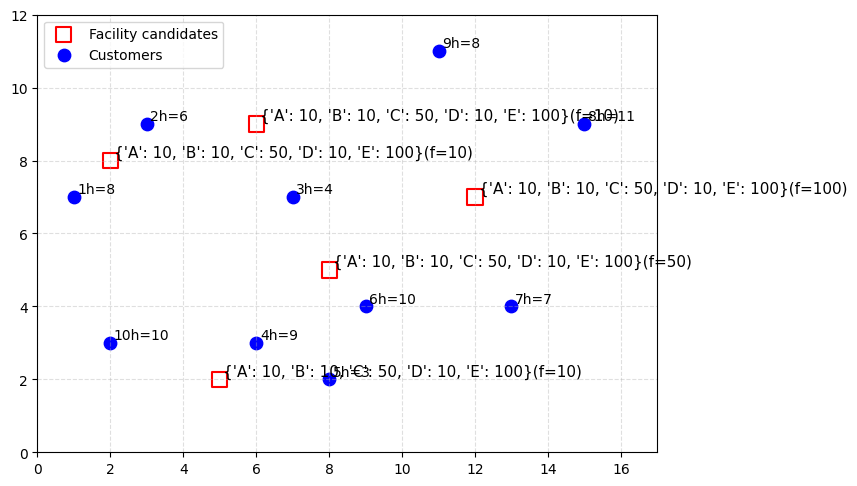

In [25]:
# Set parameter
f = {'A':10, 'B':10, 'C':50, 'D':10, 'E':100} #fixed cost
h = {
    1: 8,
    2: 6,
    3: 4,
    4: 9,
    5: 3,
    6: 10,
    7: 7,
    8: 11,
    9: 8,
    10: 10
}
alpha = 1

# Visualization
fixed_charge_plot(facilities, customers, h, f)

Gurobi Optimizer version 12.0.2 build v12.0.2rc0 (mac64[arm] - Darwin 24.6.0 24G90)

CPU model: Apple M2
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Non-default parameters:
SoftMemLimit  2

Optimize a model with 60 rows, 55 columns and 150 nonzeros
Model fingerprint: 0xf91f7080
Variable types: 0 continuous, 55 integer (55 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [8e+00, 1e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 611.5203328
Presolve time: 0.00s
Presolved: 60 rows, 55 columns, 150 nonzeros
Variable types: 0 continuous, 55 integer (55 binary)

Root relaxation: objective 3.414988e+02, 22 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0  341.49880    0   15  611.52033  341.49880  44.2%     -

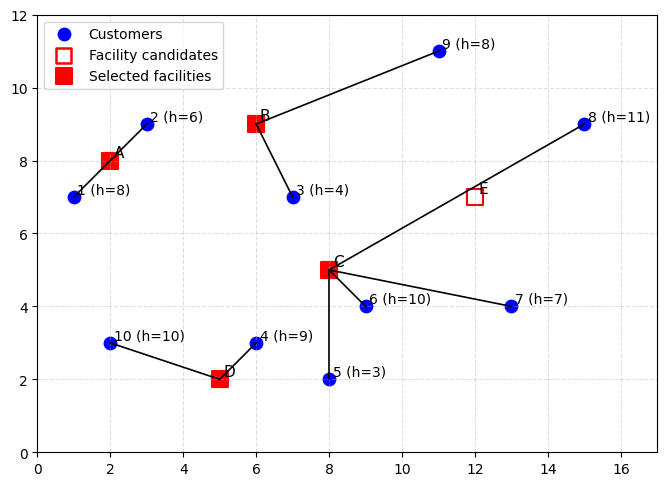

In [26]:
def uncapacitated_fixed_charge(I, J, f, h, d, alpha, plot=False, env=env):
  
  # Define Model
  m = Model(env=env)

  # Decision Variable
  x = m.addVars(J, vtype=GRB.BINARY)
  y = m.addVars(I, J, vtype=GRB.BINARY)

  # Set objective function
  m.setObjective(quicksum(f[j]*x[j] for j in J)+alpha*quicksum(h[i]*d[(i,j)]*y[i,j] for i in I for j in J), GRB.MINIMIZE)

  # Add constraints

  # 1.Demand at node 𝑖 ∈ 𝐼 cannot be assigned to a facility at candidate location 𝑗 ∈ 𝐽
  #   unless a facility is built at node 𝑗 ∈ 𝐽
  for i in I:
    for j in J:
      m.addConstr(y[i,j] <= x[j])

  # 2.Each demand node 𝑖 ∈ 𝐼 must be served by one facility 𝑗 ∈ 𝐽
  for i in I:
    m.addConstr(quicksum(y[i,j] for j in J) == 1)

  # Optimize
  m.optimize()

  # Result
  print(f'Objective Value: {m.ObjVal}')

  # Visualization
  if plot:
    result_plot1(x, y, I, J, h, facilities, customers)

  if m.Status == GRB.OPTIMAL:
    return m.Runtime
  else:
    print("메모리 제한(SoftMemLimit)에 도달하여 계산이 중단되었습니다.")
    return None

# Run the model
result = uncapacitated_fixed_charge(I, J, f, h, d, alpha, plot=True)

<a name="capacitated"></a>
## Capacitated fixed charge facility location problem

### Given
- Customers set $I$
- Candidate facility location set $J$
<br>

### Input
- $f_j$ = fixed cost of building a facility at candidate location $j\in J$
- $h_j$ = customer demand at node $i\in I$
- $d_{ij}$ = distance between demand node $i\in I$ and candidate $j\in J$
- $\alpha$ = transportation cost per unit distance and unit demand
- $k_j$ = capacity of a facility at candidate location $j\in J$

<br>

### Decision Variable
- $X_j \begin{cases}1 \text{ if we locate a factility at candidate location }j\in J \\ 0\text{ otherwise}\end{cases}$
- $Y_{ij} \begin{cases}1 \text{ if customer }i\in I \text{ is served by a facility at }j\in J \\ 0\text{ otherwise}\end{cases}$

<br>

### Mathematical model

min $ \sum_{j\in J}f_jX_j+\alpha\sum_{i\in I}\sum_{j\in J}h_id_{ij}Y_{ij} $

$ \begin{align}\text{s.t } &Y_{ij}\le X_j \quad\forall i\in I,j\in J \\ &\sum_{j\in J}Y_{ij}=1 \quad\forall i\in I \\ &\sum_{i\in I}h_iY_{ij}\le k_jX_j\quad\forall j\in J \\ &X_j\in\{0,1\}\quad\forall j\in J\\ &Y_{ij}\in\{0,1\}\quad\forall i\in I,j\in J \end{align}$

#### Problem situation

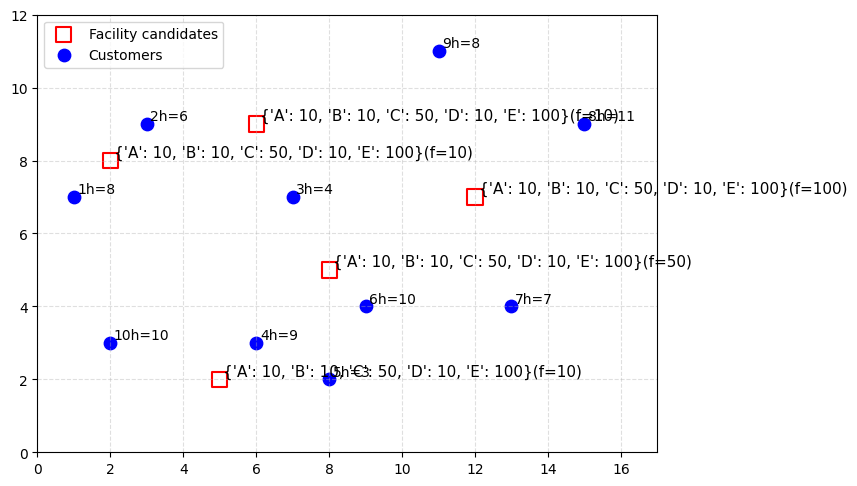

In [27]:
# Set parameter
f = {'A':10, 'B':10, 'C':50, 'D':10, 'E':100} #fixed cost
h = {
    1: 8,
    2: 6,
    3: 4,
    4: 9,
    5: 3,
    6: 10,
    7: 7,
    8: 11,
    9: 8,
    10: 10
}
alpha = 1
k = {'A':8, 'B':20, 'C':15, 'D':25, 'E':30} #capacity of a facility at candidate location 𝑗

# Visualization
fixed_charge_plot(facilities, customers, h, f)

Gurobi Optimizer version 12.0.2 build v12.0.2rc0 (mac64[arm] - Darwin 24.6.0 24G90)

CPU model: Apple M2
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Non-default parameters:
SoftMemLimit  2

Optimize a model with 65 rows, 55 columns and 205 nonzeros
Model fingerprint: 0xc7309781
Variable types: 0 continuous, 55 integer (55 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+01]
  Objective range  [8e+00, 1e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 693.2837923
Presolve removed 15 rows and 4 columns
Presolve time: 0.00s
Presolved: 50 rows, 51 columns, 184 nonzeros
Variable types: 0 continuous, 51 integer (51 binary)

Root relaxation: objective 3.632916e+02, 26 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0  363.29160    0 

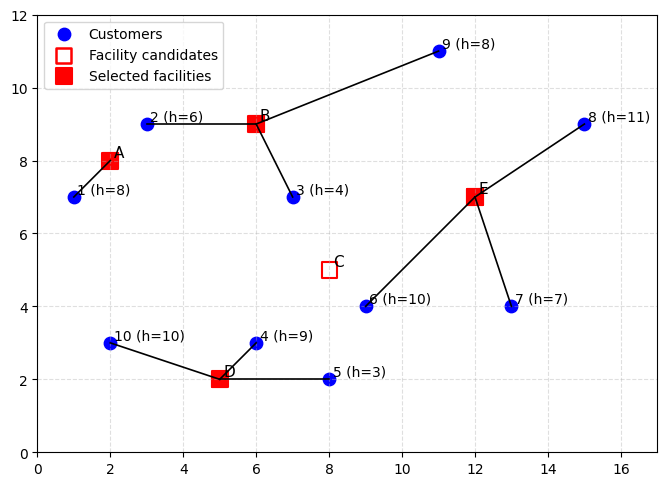

In [28]:
def capacitated_fixed_charge(I, J, f, h, d, alpha, k, plot=False, env=env):
  
  # Define Model
  m = Model(env=env)

  # Decision Variable
  x = m.addVars(J, vtype=GRB.BINARY)
  y = m.addVars(I, J, vtype=GRB.BINARY)

  # Set objective function
  m.setObjective(quicksum(f[j]*x[j] for j in J)+alpha*quicksum(h[i]*d[(i,j)]*y[i,j] for i in I for j in J), GRB.MINIMIZE)

  # Add constraints

  # 1.Demand at node 𝑖 ∈ 𝐼 cannot be assigned to a facility at candidate location 𝑗 ∈ 𝐽
  #   unless a facility is built at node 𝑗 ∈ 𝐽
  for i in I:
    for j in J:
      m.addConstr(y[i,j] <= x[j])

  # 2.Each demand node 𝑖 ∈ 𝐼 must be served by one facility 𝑗 ∈ 𝐽
  for i in I:
    m.addConstr(quicksum(y[i,j] for j in J) == 1)

  # 3.
  for j in J:
    m.addConstr(quicksum(h[i]*y[i,j] for i in I) <= k[j]*x[j])

  # Optimize
  m.optimize()

  # Result
  print(f'Objective Value: {m.ObjVal}')

  # Visualization
  if plot:
    result_plot1(x, y, I, J, h, facilities, customers)

  if m.Status == GRB.OPTIMAL:
    return m.Runtime
  else:
    print("메모리 제한(SoftMemLimit)에 도달하여 계산이 중단되었습니다.")
    return None

# Run the model
result = capacitated_fixed_charge(I, J, f, h, d, alpha, k, plot=True)

<a name="computation_time"></a>
# 2. Computation Time

- 문제 크기에 따른 계산 시간 변화 관찰


## Functions

In [29]:
import random
def random_node_generator(facility_num, customer_num, start_x=1, start_y=1, end_x=20, end_y=20, seed=42):
    random.seed(seed)
    
    # 랜덤 노드 생성
    facilities = {}
    customers = {}
    
    for i in range(facility_num):
        facilities[i] = (random.randint(start_x, end_x), random.randint(start_y, end_y))
        
    for i in range(customer_num):
        customers[i] = (random.randint(start_x, end_x), random.randint(start_y, end_y))
    
    # 노드 목록 생성
    I = list(customers.keys())
    J = list(facilities.keys())

    # Distance
    def calculate_distance(I, J):
        d = {}
        for key, i in customers.items():
            for key2, j in facilities.items():
                dx = i[0] - j[0]
                dy = i[1] - j[1]
                dist = math.sqrt(dx*dx + dy*dy)
                d[(key,key2)] = dist
        return d 

    d = calculate_distance(I, J)

    h = {i: random.randint(1, 20) for i in I}

    c = {j: random.choice([10,50,100]) for j in J}

    return facilities, customers, d, I, J, h, c

## P-median

Gurobi Optimizer version 12.0.2 build v12.0.2rc0 (mac64[arm] - Darwin 24.6.0 24G90)

CPU model: Apple M2
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Non-default parameters:
SoftMemLimit  2

Optimize a model with 2441 rows, 2460 columns and 7260 nonzeros
Model fingerprint: 0xf2d1ea25
Variable types: 0 continuous, 2460 integer (2460 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e+00, 4e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 5e+00]
Found heuristic solution: objective 4398.1930920
Presolve time: 0.01s
Presolved: 2441 rows, 2460 columns, 7260 nonzeros
Variable types: 0 continuous, 2460 integer (2460 binary)

Root relaxation: objective 1.202693e+03, 543 iterations, 0.01 seconds (0.01 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0    1202.6925530 120

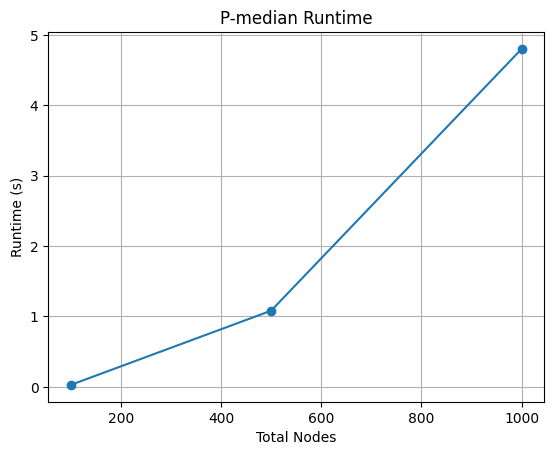

메모리 제한에 도달한 노드 목록:  [2000]


In [30]:
total_nodes = [100, 500, 1000, 2000]
memory_out = []
runtime_list = []
P = 5

for total_node in total_nodes:
    facility_num = (total_node // 2) + 10
    customer_num = total_node - facility_num
    facilities, customers, d, I, J, h, c = random_node_generator(facility_num, customer_num)
    runtime = p_median(I, J, h, d, P, plot=False)
    if runtime is not None:
        runtime_list.append(runtime)
    else:
        print(f"Runtime is None for total_node: {total_node}")
        total_nodes.remove(total_node)
        memory_out.append(total_node)
        break

plt.plot(total_nodes, runtime_list, marker='o')
plt.xlabel('Total Nodes')
plt.ylabel('Runtime (s)')
plt.title('P-median Runtime')
plt.grid(True)
plt.show()

print("메모리 제한에 도달한 노드 목록: ",memory_out)

## Covering Problem

### Set covering problem

Gurobi Optimizer version 12.0.2 build v12.0.2rc0 (mac64[arm] - Darwin 24.6.0 24G90)

CPU model: Apple M4
Thread count: 10 physical cores, 10 logical processors, using up to 10 threads

Non-default parameters:
SoftMemLimit  2

Optimize a model with 40 rows, 60 columns and 1135 nonzeros
Model fingerprint: 0x7b03ed68
Variable types: 0 continuous, 60 integer (60 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+01, 1e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 220.0000000
Presolve removed 40 rows and 60 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 10 available processors)

Solution count 2: 30 220 

Optimal solution found (tolerance 1.00e-04)
Best objective 3.000000000000e+01, best bound 3.000000000000e+01, gap 0.0000%
Objective Value: 30.0
Gurobi Optimizer version 12.

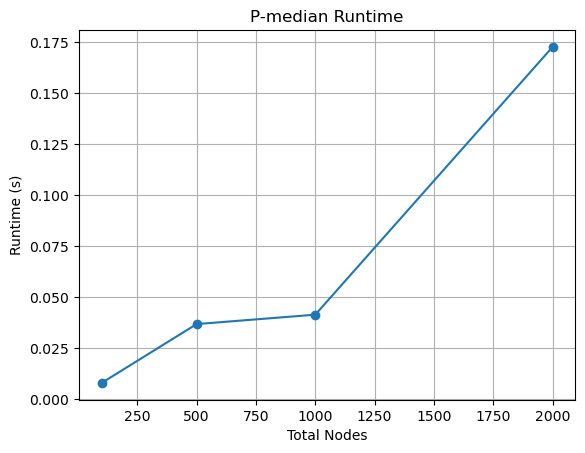

In [ ]:
total_nodes = [100, 500, 1000, 2000]
memory_out = []
runtime_list = []
P = 5
S = 10

for total_node in total_nodes:
    facility_num = (total_node // 2) + 10
    customer_num = total_node - facility_num
    facilities, customers, d, I, J, h, c = random_node_generator(facility_num, customer_num)
    Ni = compute_Ni(S)
    runtime = set_covering(I, J, c, Ni, plot=False)
    if runtime is not None:
        runtime_list.append(runtime)
    else:
        print(f"Runtime is None for total_node: {total_node}")
        total_nodes.remove(total_node)
        memory_out.append(total_node)
        break

plt.plot(total_nodes, runtime_list, marker='o')
plt.xlabel('Total Nodes')
plt.ylabel('Runtime (s)')
plt.title('P-median Runtime')
plt.grid(True)
plt.show()

print("메모리 제한에 도달한 노드 목록: ",memory_out)


### Maximal covering problem

Gurobi Optimizer version 12.0.2 build v12.0.2rc0 (mac64[arm] - Darwin 24.6.0 24G90)

CPU model: Apple M4
Thread count: 10 physical cores, 10 logical processors, using up to 10 threads

Non-default parameters:
SoftMemLimit  2

Optimize a model with 41 rows, 100 columns and 1235 nonzeros
Model fingerprint: 0x6bcc5622
Variable types: 0 continuous, 100 integer (100 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e+00, 2e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [5e+00, 5e+00]
Found heuristic solution: objective 384.0000000

Explored 0 nodes (0 simplex iterations) in 0.00 seconds (0.00 work units)
Thread count was 1 (of 10 available processors)

Solution count 1: 384 

Optimal solution found (tolerance 1.00e-04)
Best objective 3.840000000000e+02, best bound 3.840000000000e+02, gap 0.0000%
Objective Value: 384.0
Gurobi Optimizer version 12.0.2 build v12.0.2rc0 (mac64[arm] - Darwin 24.6.0 24G90)

CPU model: Apple M4
Thread count: 10 physi

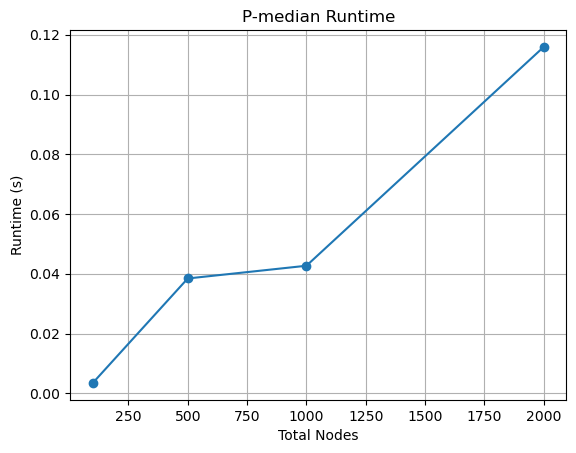

In [ ]:
total_nodes = [100, 500, 1000, 2000]
memory_out = []
runtime_list = []
P = 5
S = 10

for total_node in total_nodes:
    facility_num = (total_node // 2) + 10
    customer_num = total_node - facility_num
    facilities, customers, d, I, J, h, c = random_node_generator(facility_num, customer_num)
    Ni = compute_Ni(S)
    runtime = max_covering(I, J, h, P, Ni, plot=False)
    if runtime is not None:
        runtime_list.append(runtime)
    else:
        print(f"Runtime is None for total_node: {total_node}")
        total_nodes.remove(total_node)
        memory_out.append(total_node)
        break

plt.plot(total_nodes, runtime_list, marker='o')
plt.xlabel('Total Nodes')
plt.ylabel('Runtime (s)')
plt.title('P-median Runtime')
plt.grid(True)
plt.show()

print("메모리 제한에 도달한 노드 목록: ",memory_out)


## P-center problem

Gurobi Optimizer version 12.0.2 build v12.0.2rc0 (mac64[arm] - Darwin 24.6.0 24G90)

CPU model: Apple M4
Thread count: 10 physical cores, 10 logical processors, using up to 10 threads

Non-default parameters:
SoftMemLimit  2

Optimize a model with 2481 rows, 2461 columns and 9692 nonzeros
Model fingerprint: 0x9d09b4cc
Variable types: 1 continuous, 2460 integer (2460 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 5e+00]
Found heuristic solution: objective 22.6274170
Presolve removed 3 rows and 3 columns
Presolve time: 0.01s
Presolved: 2478 rows, 2458 columns, 9533 nonzeros
Variable types: 1 continuous, 2457 integer (2457 binary)

Root relaxation: objective 4.222668e+00, 1055 iterations, 0.01 seconds (0.05 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0  

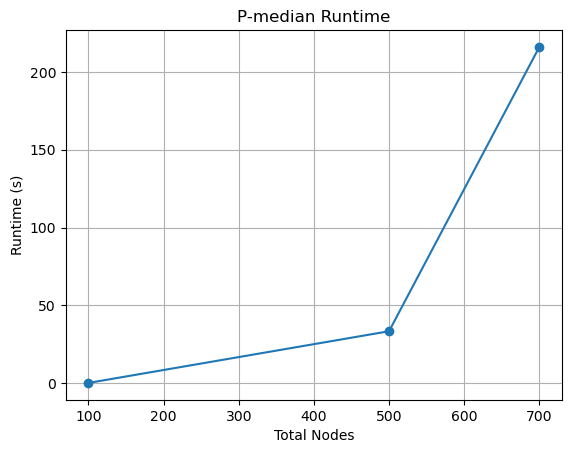

In [ ]:
total_nodes = [100, 500, 700]
memory_out = []
runtime_list = []
P = 5

for total_node in total_nodes:
    facility_num = (total_node // 2) + 10
    customer_num = total_node - facility_num
    facilities, customers, d, I, J, h, c = random_node_generator(facility_num, customer_num)
    runtime = p_center(I, J, d, P, plot=False)
    if runtime is not None:
        runtime_list.append(runtime)
    else:
        print(f"Runtime is None for total_node: {total_node}")
        total_nodes.remove(total_node)
        memory_out.append(total_node)
        break

plt.plot(total_nodes, runtime_list, marker='o')
plt.xlabel('Total Nodes')
plt.ylabel('Runtime (s)')
plt.title('P-median Runtime')
plt.grid(True)
plt.show()

print("메모리 제한에 도달한 노드 목록: ",memory_out)


## Fixed charge location problem

### Uncapacitated fixed charge facility location problem


Gurobi Optimizer version 12.0.2 build v12.0.2rc0 (mac64[arm] - Darwin 24.6.0 24G90)

CPU model: Apple M4
Thread count: 10 physical cores, 10 logical processors, using up to 10 threads

Non-default parameters:
SoftMemLimit  2

Optimize a model with 2440 rows, 2460 columns and 7200 nonzeros
Model fingerprint: 0xbf84fa3e
Variable types: 0 continuous, 2460 integer (2460 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e+00, 4e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 5753.1098943
Presolve time: 0.01s
Presolved: 2440 rows, 2460 columns, 7200 nonzeros
Variable types: 0 continuous, 2460 integer (2460 binary)

Root relaxation: objective 1.066476e+03, 188 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0    1066.4764527 

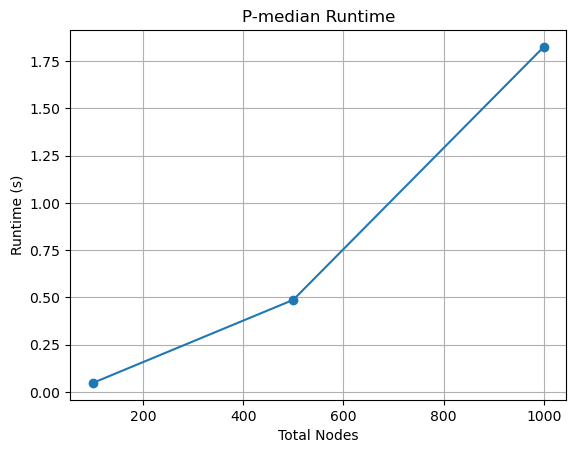

In [ ]:
total_nodes = [100, 500, 1000, 2000]
memory_out = []
runtime_list = []
alpha = 1

for total_node in total_nodes:
    facility_num = (total_node // 2) + 10
    customer_num = total_node - facility_num
    facilities, customers, d, I, J, h, c = random_node_generator(facility_num, customer_num)
    f = {j: random.choice([10,50,100]) for j in J}
    runtime = uncapacitated_fixed_charge(I, J, f, h, d, alpha, plot=False)
    if runtime is not None:
        runtime_list.append(runtime)
    else:
        print(f"Runtime is None for total_node: {total_node}")
        total_nodes.remove(total_node)
        memory_out.append(total_node)
        break

plt.plot(total_nodes, runtime_list, marker='o')
plt.xlabel('Total Nodes')
plt.ylabel('Runtime (s)')
plt.title('P-median Runtime')
plt.grid(True)
plt.show()

print("메모리 제한에 도달한 노드 목록: ",memory_out)


### Capacitated fixed charge facility location problem

Gurobi Optimizer version 12.0.2 build v12.0.2rc0 (mac64[arm] - Darwin 24.6.0 24G90)

CPU model: Apple M4
Thread count: 10 physical cores, 10 logical processors, using up to 10 threads

Non-default parameters:
SoftMemLimit  2

Optimize a model with 2500 rows, 2460 columns and 9660 nonzeros
Model fingerprint: 0x0a2f2ce7
Variable types: 0 continuous, 2460 integer (2460 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+02]
  Objective range  [2e+00, 4e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 5600.6442358
Presolve removed 621 rows and 414 columns
Presolve time: 0.02s
Presolved: 1879 rows, 2046 columns, 9269 nonzeros
Variable types: 0 continuous, 2046 integer (2046 binary)

Root relaxation: objective 1.210550e+03, 204 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

   

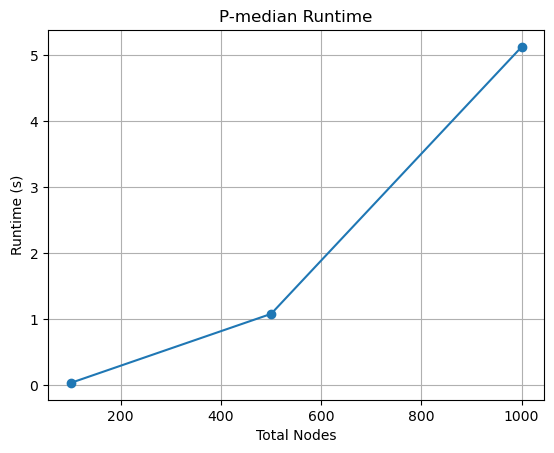

In [ ]:
total_nodes = [100, 500, 1000, 2000]
memory_out = []
runtime_list = []
alpha = 1

for total_node in total_nodes:
    facility_num = (total_node // 2) + 10
    customer_num = total_node - facility_num
    facilities, customers, d, I, J, h, c = random_node_generator(facility_num, customer_num)
    f = {j: random.choice([10,50,100]) for j in J}
    k = {j: random.choice([10,50,100]) for j in J}
    runtime = capacitated_fixed_charge(I, J, f, h, d, alpha, k, plot=False)
    if runtime is not None:
        runtime_list.append(runtime)
    else:
        print(f"Runtime is None for total_node: {total_node}")
        total_nodes.remove(total_node)
        memory_out.append(total_node)
        break

plt.plot(total_nodes, runtime_list, marker='o')
plt.xlabel('Total Nodes')
plt.ylabel('Runtime (s)')
plt.title('P-median Runtime')
plt.grid(True)
plt.show()

print("메모리 제한에 도달한 노드 목록: ",memory_out)
